In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

KeyboardInterrupt: 

In [3]:
df = pd.read_csv('Uni_Admission.csv')
df

,Serial_No,GRE_Score,TOFEL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.head()

,Serial_No,GRE_Score,TOFEL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial_No,GRE_Score,TOFEL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
df.fillna(26)

,Serial_No,GRE_Score,TOFEL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.isnull().sum()

Serial_No            0
GRE_Score            0
TOFEL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [8]:
df.shape

(400, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOFEL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [10]:
df.describe()

,Serial_No,GRE_Score,TOFEL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
X = df.drop(columns= 'Chance_of_Admit')
Y = df['Chance_of_Admit']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size= 0.2, random_state=2)

In [13]:
rfr = RandomForestRegressor(n_estimators= 500)
rfr.fit(xtrain, ytrain)
y_pred = rfr.predict(xtest)
y_pred

array([0.45864, 0.91484, 0.61116, 0.68808, 0.77852, 0.93164, 0.65982,
       0.87082, 0.70444, 0.71938, 0.65686, 0.55758, 0.58804, 0.8852 ,
       0.9163 , 0.76994, 0.93966, 0.7307 , 0.50418, 0.62584, 0.79058,
       0.83144, 0.91422, 0.7565 , 0.94134, 0.7412 , 0.57536, 0.85998,
       0.83068, 0.56276, 0.61166, 0.6817 , 0.94734, 0.68146, 0.53378,
       0.70002, 0.73596, 0.67708, 0.46872, 0.57472, 0.7115 , 0.64424,
       0.6456 , 0.61766, 0.91682, 0.65048, 0.87118, 0.50304, 0.66214,
       0.90854, 0.7061 , 0.57752, 0.82266, 0.65472, 0.85014, 0.87224,
       0.81988, 0.71254, 0.66458, 0.53456, 0.9328 , 0.73816, 0.77286,
       0.96242, 0.49772, 0.73102, 0.64306, 0.8352 , 0.8688 , 0.59164,
       0.88742, 0.68536, 0.58208, 0.8165 , 0.7057 , 0.91876, 0.70796,
       0.7596 , 0.7005 , 0.74994])

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, y_pred)
r2

0.8072311378311323

In [14]:
y_pred_as_an_input = rfr.predict(np.array([[4, 322, 110, 3, 3.5, 2.5, 8.67, 1]]))
y_pred_as_an_input

array([0.74512])

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_pred)

0.04293775000000009

In [19]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(ytest, y_pred)

0.061457609659016255

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_pred)

0.0037770377850000077

[Text(0.5338861851092896, 0.9666666666666667, 'x[6] <= 8.645\nsquared_error = 0.022\nsamples = 200\nvalue = 0.718'),
 Text(0.25708674863387976, 0.9, 'x[6] <= 8.035\nsquared_error = 0.012\nsamples = 100\nvalue = 0.613'),
 Text(0.16649590163934427, 0.8333333333333334, 'x[1] <= 317.0\nsquared_error = 0.01\nsamples = 41\nvalue = 0.531'),
 Text(0.10894808743169399, 0.7666666666666667, 'x[0] <= 128.0\nsquared_error = 0.009\nsamples = 38\nvalue = 0.521'),
 Text(0.04918032786885246, 0.7, 'x[2] <= 101.0\nsquared_error = 0.007\nsamples = 14\nvalue = 0.478'),
 Text(0.0273224043715847, 0.6333333333333333, 'x[1] <= 308.0\nsquared_error = 0.003\nsamples = 8\nvalue = 0.424'),
 Text(0.02185792349726776, 0.5666666666666667, 'x[4] <= 3.5\nsquared_error = 0.002\nsamples = 7\nvalue = 0.414'),
 Text(0.01092896174863388, 0.5, 'x[6] <= 7.08\nsquared_error = 0.001\nsamples = 5\nvalue = 0.432'),
 Text(0.00546448087431694, 0.43333333333333335, 'squared_error = 0.0\nsamples = 1\nvalue = 0.36'),
 Text(0.016393442

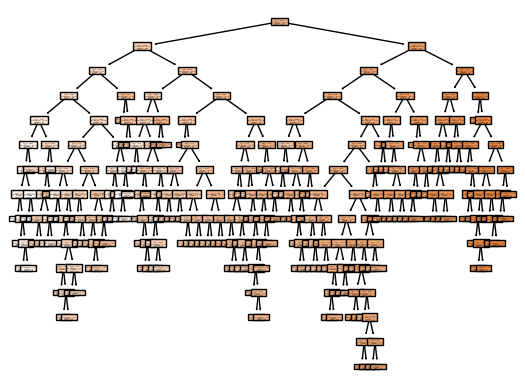

In [16]:
tree.plot_tree(rfr.estimators_[256], filled = True)